# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
---
* [1.복습 ](#복습) <br>
* [2. 이미지](#1.이미지) <br>
     *  [2.1 이미지의 특성](#1.이미지의-특성)
         * [채널](#채널)<br>
     *  [2.2 이미지 데이터 ](#2.이미지-데이터)
     * [2.3 이미지 전처리](#3.이미지-전처리)<br>
     * [2.3 이미지 데이터 학습](#4.이미지-데이터-학습)<br>
       
*  [3. 파이프라인](#파이프라인)<br>
    * [3.1 Pipeline](#Pipeline)<br>
        * [structured array](#structured-array)<br>
    * [3.2 make_pipeline](#make_pipeline)<br>
        * [단점](#Pipeline-단점)<br>
    * [3.3 ColumnTransformer ](#ColumnTransformer)<br>
    * [고급 기법: overloading](#overloading)<br>

---
### 복습

크기가 큰 데이터를 탑재된 것이 아닌 인터넷에서 다운로드함
- `fetch_california_housing`
    - 미국의 캘리포니아의 하우싱에 관한 데이터로 20640 행과 8개의 수치형 attributes 로 집값을 예측함
        - 1990년 미국의 집값의 중앙값(median)
            - MedInc 각 블록 별 소득(중앙값)      
            - HouseAge      집 연식
            - AveRooms      평균 방 갯수
            - AveBedrms     평균 침실 갯수
            - Population    블록 별 인구
            - AveOccup      평균 주택 점유 수
            - Latitude      위도
            - Longitude     경도

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
data=fetch_california_housing() #다운로드

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [3]:
import numpy as np
import pandas as pd

In [7]:
housing =pd.DataFrame(data.data, columns=data.feature_names)

In [8]:
housing['target']= data.target

In [9]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- target 값이 float 이므로 regression 문제
- 20,640  행의 데이터가 있음 (이전의 1000개의 도안되던 데이터..)
    - 결측치 없음
    - embeding 불필요

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


 데이터의 분포 확인

In [11]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


수치를 시각화하여 한번에 확인
- population의 분포가 크고 이상치가 많은 것을 알 수있음
    - 모델 성능에 큰 영향을 줄 가능성 있음

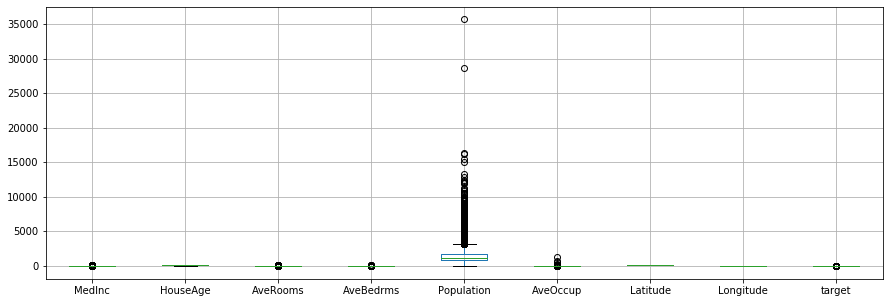

In [13]:
housing.boxplot(figsize=(15,5))

In [4]:
import seaborn as sns

예측이 힘든 데이터
- 뚜력한 선형적 관계나 비선형적 관계가 보이지 않음

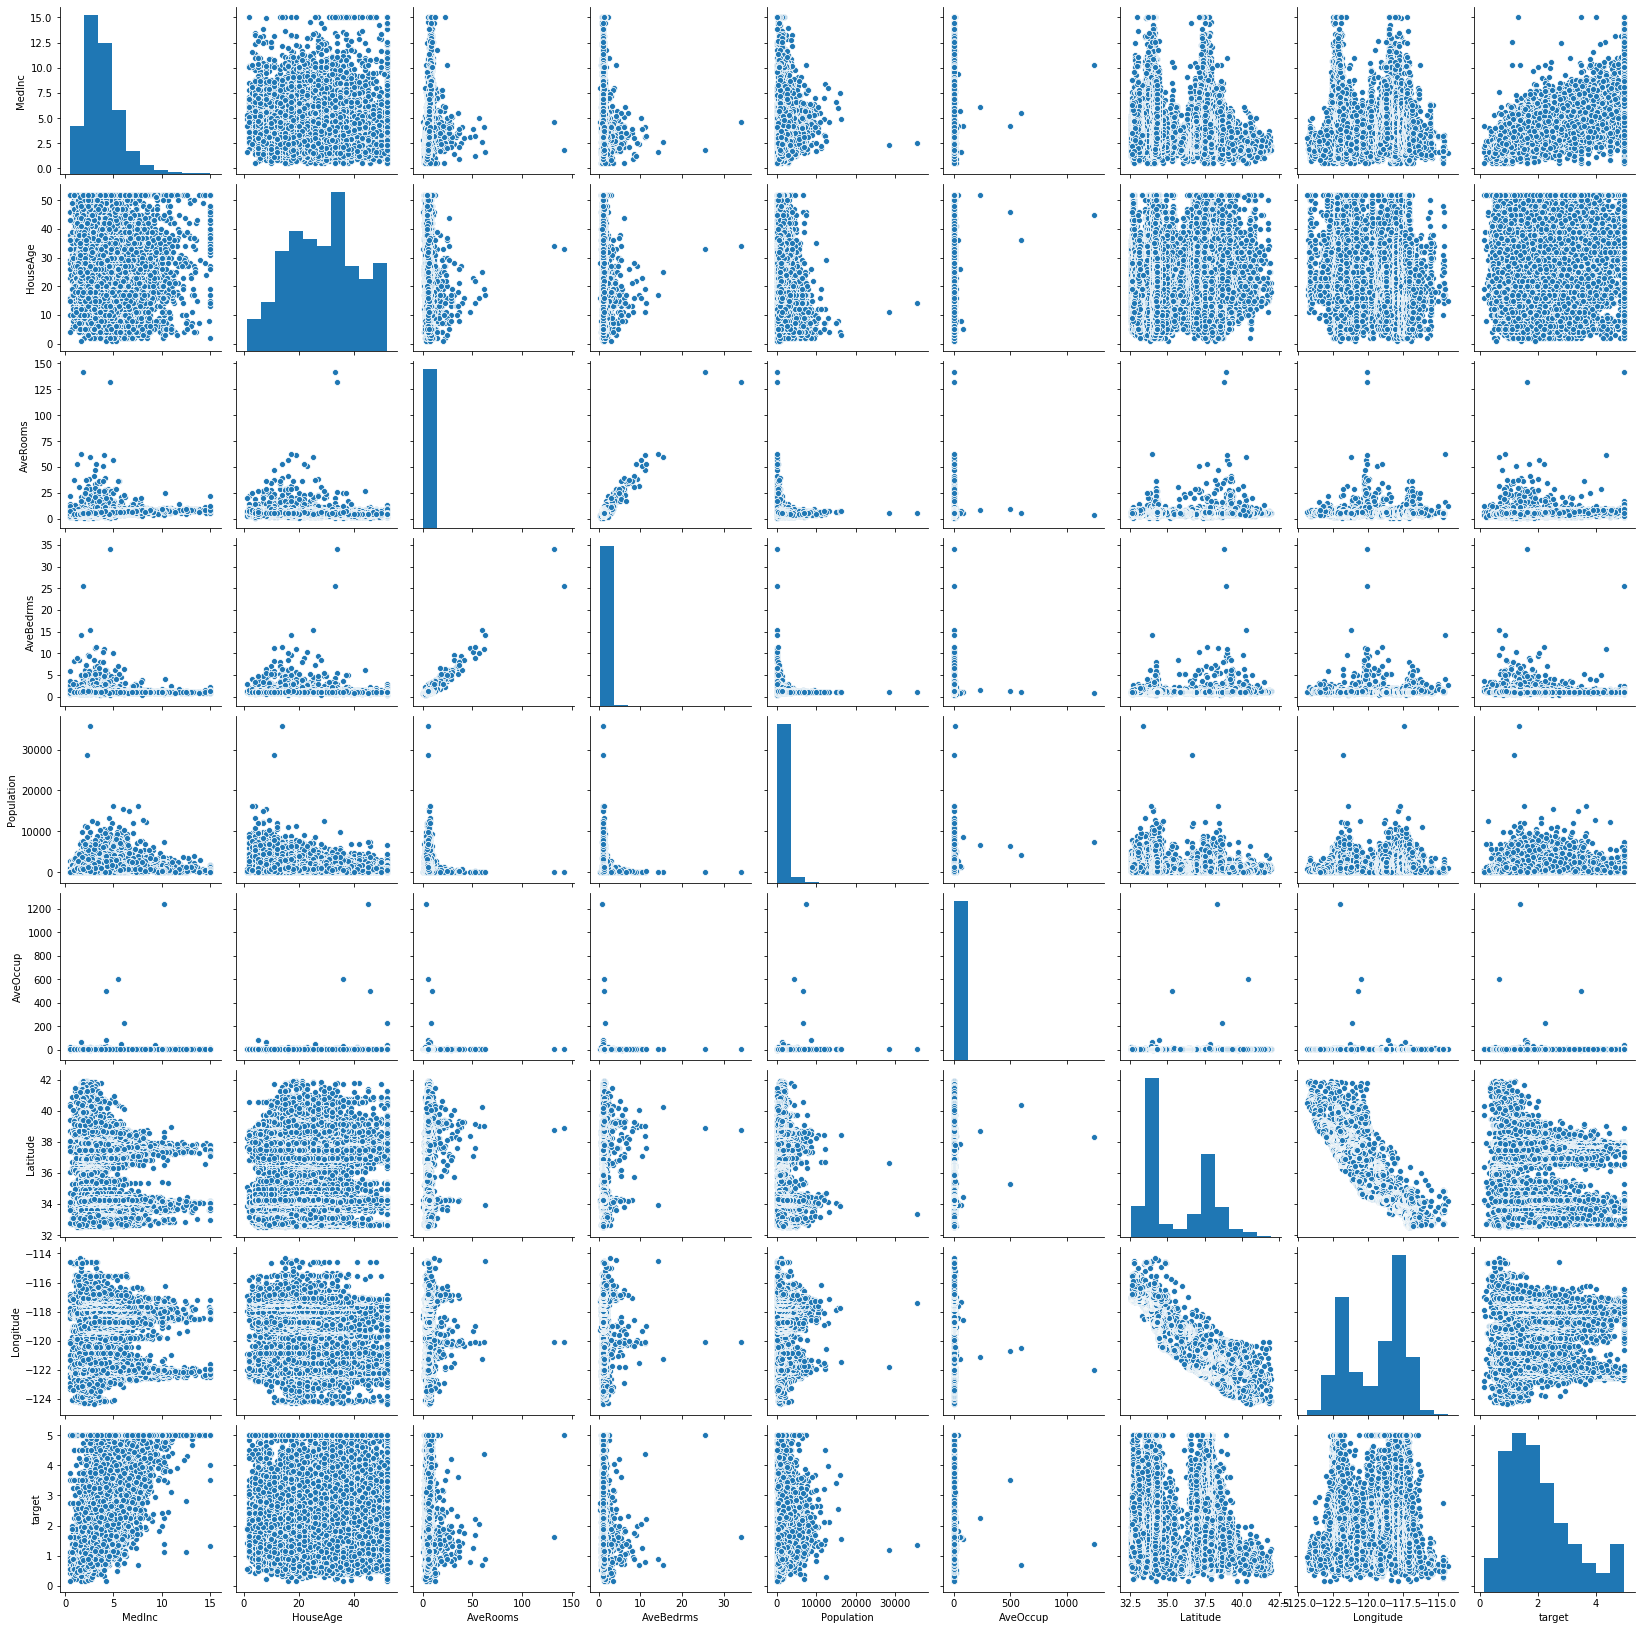

In [15]:
sns.pairplot(housing)

In [17]:
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


- AveRoomes, AveBedrooms는 약간 강한 양의 상관관계가 있음
- Latitude와 Latitudes는 강한 음의 상관관계가 있음

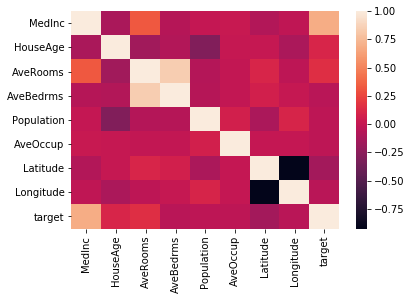

In [18]:
sns.heatmap(housing.corr())

모델링

LinearRegression, KNeighborsRegressor ,DecisionTreeRegressor, SVR(Support Vector Regressor)이용하여 성능 비교 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#regression models- 4 개의  Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [83]:
X_train, X_test,y_train,y_test= train_test_split(housing.iloc[:,:-1], housing.target)

In [84]:
lr=LinearRegression()  #인스턴스화
knn=KNeighborsRegressor()
svm=SVR()
dt=DecisionTreeRegressor()

In [85]:
lr.fit(X_train,y_train) #학습
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

검정

In [86]:
lr.score(X_test,y_test)

0.6125306115862491

In [87]:
knn.score(X_test,y_test) #예측 안좋음

0.13011982254384158

In [88]:
svm.score(X_test,y_test) #SVR 느린 알고리즘, 예측도 안좋음

-0.0062840548648746

In [89]:
dt.score(X_test,y_test)

0.6181505802283541

- 전반적으로regression 모델들의 성능이 좋지 않음.
    * regression score: R-squared 
        - 1에 가까울 수록 좋음
    
 ---  
### 표준화
데이터 표준화 이전 이후 비교
- z-score normalization 라 하며 feature 샘플의 평균 u를 데이터로부터 제거하여 샘플의 표준편차 s 로 나누어 스케일링함
    -  표준 정규 분포를 따름 ( 평균=0, 표준편차=1)
    - $z = \frac{x - u}{s}$

In [90]:
from  sklearn.preprocessing import StandardScaler

In [91]:
ss=StandardScaler()

In [92]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [93]:
lr=LinearRegression()  #인스턴스화
knn=KNeighborsRegressor()
svm=SVR()
dt=DecisionTreeRegressor()

In [94]:
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [95]:
lr.score(X_test,y_test)  #R^2 값이 엄청나게 증가함

0.6112886905608663

In [96]:
knn.score(X_test,y_test) # R^2 값이 엄청나게 증가함

0.6970891536149051

In [97]:
svm.score(X_test,y_test) # R^2 값이 엄청나게 증가함

0.6903904704732883

In [98]:
dt.score(X_test,y_test) # 낮아짐

0.23139914281677765

모델마다 전처리 여부에대한 **성능 차이 변화가 다름**

---
## 이미지
오늘의 주제 : 이미지를 어떻게 예측하는가?
### 1.이미지의 특성

이제까지 사용한 데이터 종류
1. 정형 데이터
    - 직사각형 테이블 형식
2. 비정형 데이터
    - 이미지
    - 직사각형 테이블 형태로 표현 가능하지만 순서를 바꾸면 의미를 잃음
    - 규격화 할 수 없음
        - 성능이 좋아짐, 비용..
기계학습 예측값실제값을 loss function 으로 정의하고 loss function 최소화하는것이 목적
최소화하는 파라미터를 변화해서 찾거나 **모델의 형태**를 변화시킴

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

 #### 채널
 - 2차원: 흑백 (가로,세로,1) == (가로,세로)
 - 3차원: 칼라 (가로,세로,3)
   - 칼라 이미지는 3 차원 의 3가지 채널로 이루어짐 
       - R : 적색(red) 채널
       - G : 녹색(green) 채널
       - B : 청색(blue) 채널
     
- 4차원: 칼라에 투명도 추가 
   - 알파채널 : 투명도  
       - 해당 이미지는 배경에 따라서 배경색 바뀜
        

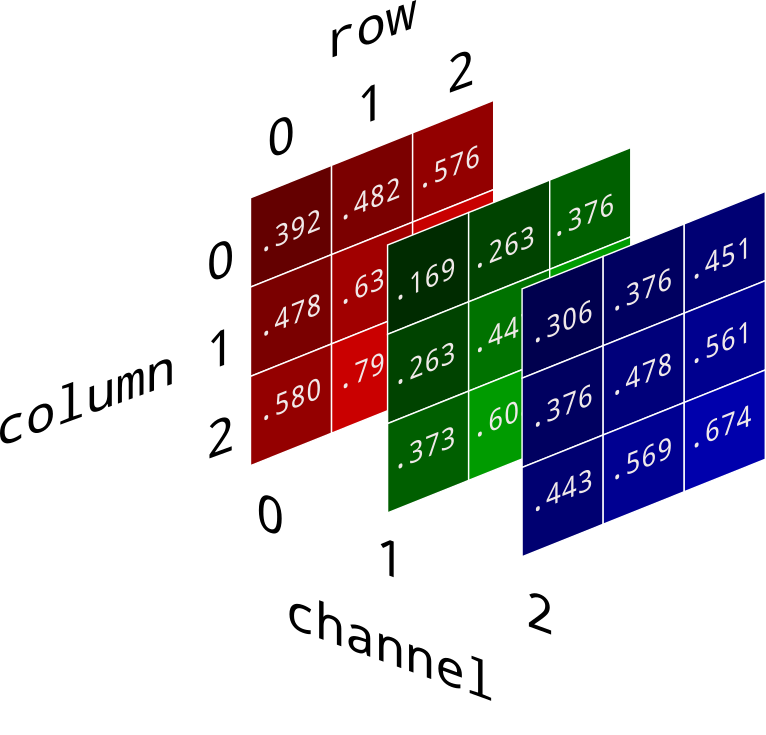

In [15]:
x= Image.open('rgb.png')
x

In [18]:
a=np.array(x)

위의 이미지 사이즈 `( 가로  세로  , 채널갯수)`
- 735 x 766 크기의 이미지가 4개읠 채널로 구성됨
- 채널 이해를 위해서 해당 이미지를 가져옴
- 보통은 R,G,B 로 3 채널로 구성됨. 

In [149]:
a.shape  #R,G,B +alpha(투명도) 로 4개의 채널로 구성 

(735, 766, 4)

In [150]:
a.dtype

dtype('uint8')

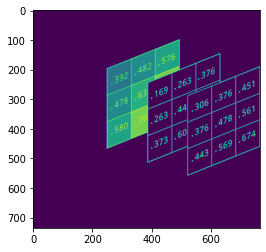

In [19]:
plt.imshow(a[...,0]) 

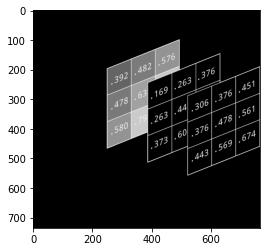

In [20]:
plt.imshow(a[...,0],cmap='gray') #red

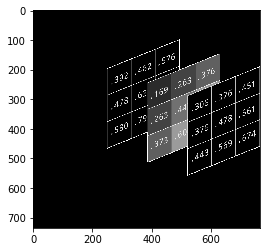

In [156]:
plt.imshow(a[...,1],cmap='gray') #green

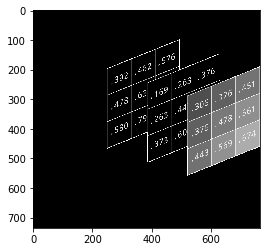

In [155]:
plt.imshow(a[...,2],cmap='gray') #blue

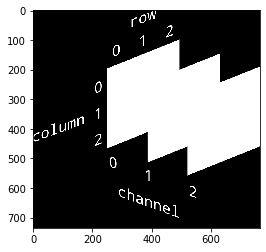

In [158]:
plt.imshow(a[...,3],cmap='gray') #alpha channel

원하는 크기만큼 자르기 가능

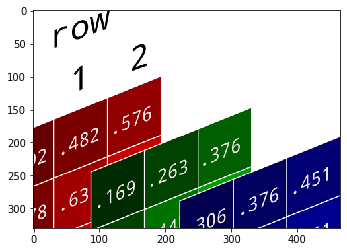

In [166]:
plt.imshow(a[:330,300:900,:]) #crop

### 2. 이미지 데이터
사이킷런의 **숫자 이미지 분류**하는 데이터 세트를 불러옴
- `load_digits` 데이터는 8x8 사이즈의 데이터로 0~9까지의 이미지를 1797개를 갖고 있음

In [1]:
from sklearn.datasets import load_digits

In [2]:
data= load_digits()

분명 이미지를 불러왔는데  numpy 의 array 가 나옴.


In [104]:
dir(data) #images

['DESCR', 'data', 'images', 'target', 'target_names']

In [108]:
data.data.shape

(1797, 64)

In [103]:
data.data #array 형태 2차원  (8,8)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [109]:
 data.images.shape #3차원 8x8 이 1797개

(1797, 8, 8)

In [106]:
data.images# 8x8 array 가 1797 개 있음 

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

이전까지는  pandasd의 `DataFrame`로 바꿔서 사용함
- pandas는 **정형데이터**
- 직사각형의 테이블
- 컬럼끼리 순서 상관 없음

이미지 데이터는 순서 상관 있음 
- 컬럼의 순서도 중요
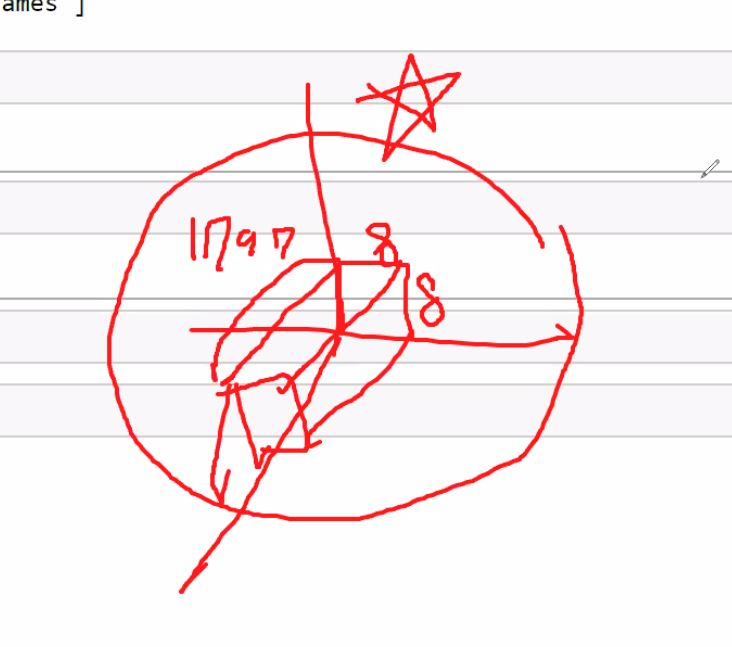

1797개의 이미지 데이터 중에서 첫번째 데이터 추출

In [110]:
data.images[0] #2차원 [[ ... ]]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [134]:
data.images[0].dtype

dtype('float64')

4 bit images의 array의 값에대한 의미
- 0~16( $2^4$=16개의 스케일)까지 gray scale에서의 명암를 뜻함
    - 0 : 검정색
    - 15 : 하얀색
    - 숫자가 클수록 밝아짐.
* 보통 이미지는 8-bit= $2^8$=256
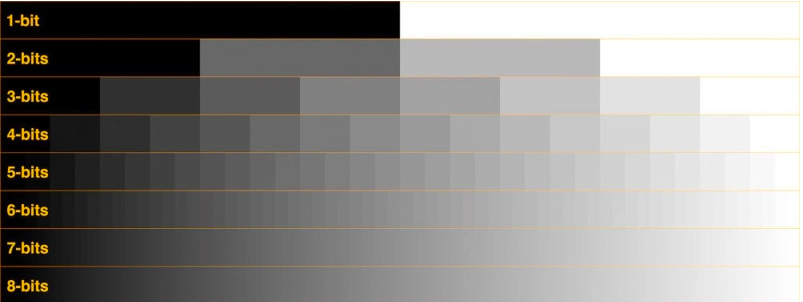

In [3]:
import matplotlib.pyplot as plt

가져온 그림은 무엇으로 보이시나요?
- `data.images`는 숫자 이미지

하지만 왜 밑의 그림은 보라색, 노랑색, 초록색 등의 색상으로 나온 이유
- 컬러정보가 없으면 cmap(color map)에서 default로 `cmap='viridis'` 색상으로 입힘
참고 : https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

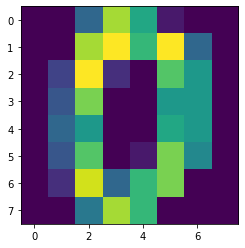

In [113]:
plt.imshow(data.images[0]) #디폴트 색상 

gray scale로 변경

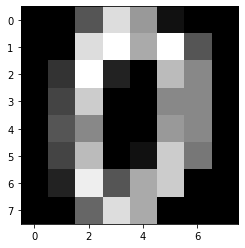

In [4]:
plt.imshow(data.images[0],cmap='gray') #원래 데이터 색상

In [119]:
data.images[0,...] #0 이미지의 array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

0번째 이미지의  숫자는 명암으로 숫자가 적힌부분을 색칠해보면 0 이미지 임을 알 수 있음

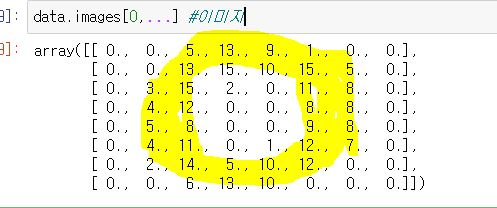

데이터를 행 별로 학습함.
-  첫번째 이미지는 0 이고 array 로는 다음과 같음을 학습
- ... 계속해서 1797개의 이미지를 학습 

기기학습의 원리: 모든 데이터의 주어진 정답과 예측값과의 차이를 최소화.
- 목적함수(target function)
    - 최대화
- 손실함수(loss function)
    -  최소화 

   
   예. 선형 회귀: $y=ax+b$ 선형식
       - 선형 회귀 학습: 정해진 규칙에 의해서 y=ax+b 를 그 차이를 최소화 하는 a,b 구함.

- 예. iris 데이터는 0 번째 데이터는 이러한 특징을 갖는 setosa임
-  iris 데이터는 1번째 데이터는 이러한 특징을 갖는 setosa임...
- cross entorpy를 loss 로 잡아서 차이를 최소화함
- 데이터 마다 차이를 최소화하도록 모델을 학습을 통해서 찾음
- 알고리즘에 따라 특성에 타라 parameter 찾음
- 하이퍼 파라미터는 학습을 통해서 찾는게 아님

- 컴퓨터에게는 이미지가 아닌 행렬,

In [121]:
data.images[0,...].reshape(1,-1) # 2차원

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [131]:
data.images.reshape(1797,8*8) 

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

학습을 위해서는 수치로 변경해서 한줄로 변경(1 dimensional array)
- 8x8의 2차원을 64의 1차원으로 변경
    - `flatten`, `ravel`
    - `reshape`
    - `data`

In [122]:
data.images[0,...].flatten( ) #1차원 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [123]:
data.images[0,...].ravel()  #라벨은 뷰이므로 flatten !! 라벨의 볼레로 ~

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [168]:
data.images[0].reshape(64)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [124]:
data.data[0] #reshape으로 이미지와 동일하게 변경 가능

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

1차원 array를 형변환을 통해서 3차원으로 변경 가능

In [130]:
np.array_equal(data.data.reshape(1797,8,8), data.images)

True

### 3.이미지 전처리  
- 알고리즘마다 성능 변화는 다르나 딥러닝에서는 scaling 을 하면 성능이 더 좋아짐
- 스케일링하면 train , test 형태 동일해야함
 
`MinMaxScaler` : 0-1 사이의 값으로 변경함
- $z = \frac{x - min(x)}{max(x)-min(x)}$
- 데이터의 대부분의 특성을 유지

holdout : train, test 데이터로 2개 분할 (2-way)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test= train_test_split(data.data, data.target)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
#!pip install mglearn

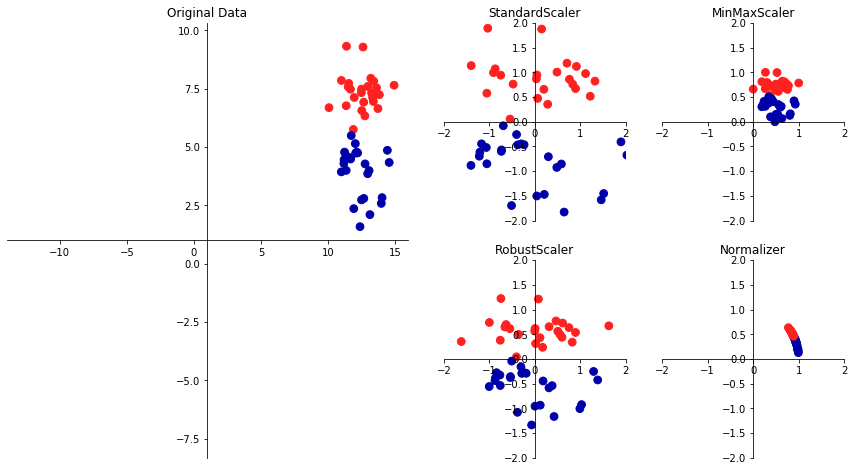

In [196]:
import mglearn
mglearn.plot_scaling.plot_scaling(); #scaler 

In [14]:
mm=MinMaxScaler()
a=mm.fit_transform(X_test[0].reshape(-1,1))

In [15]:
X_test[0].reshape(1,-1)  #2차원

array([[ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  1.,  2.,  0.,  0.,  0.,  5.,
        15.,  2., 15.,  9.,  1.,  0.,  0., 11., 13.,  6., 16., 16.,  9.,
         0.,  0., 13., 16., 16., 16., 10.,  2.,  0.,  0.,  2.,  7., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.]])

In [16]:
X_test[0].reshape(8,8)  #2차원

array([[ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13., 10.,  1.,  2.,  0.,  0.],
       [ 0.,  5., 15.,  2., 15.,  9.,  1.,  0.],
       [ 0., 11., 13.,  6., 16., 16.,  9.,  0.],
       [ 0., 13., 16., 16., 16., 10.,  2.,  0.],
       [ 0.,  2.,  7., 13., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 11.,  0.,  0.,  0.]])

In [17]:
a.reshape(8,8)         #이미지 표준화(MinMaxScaler)

array([[0.    , 0.    , 0.    , 0.625 , 0.75  , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.25  , 0.9375, 0.0625, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.625 , 0.0625, 0.125 , 0.    , 0.    ],
       [0.    , 0.3125, 0.9375, 0.125 , 0.9375, 0.5625, 0.0625, 0.    ],
       [0.    , 0.6875, 0.8125, 0.375 , 1.    , 1.    , 0.5625, 0.    ],
       [0.    , 0.8125, 1.    , 1.    , 1.    , 0.625 , 0.125 , 0.    ],
       [0.    , 0.125 , 0.4375, 0.8125, 0.6875, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.8125, 0.6875, 0.    , 0.    , 0.    ]])

0~15까지의 16개의 값을 갖음

In [18]:
X_test[0]/16      #표준화(MinMaxScaler)과 동일.

array([0.    , 0.    , 0.    , 0.625 , 0.75  , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.25  , 0.9375, 0.0625, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.625 , 0.0625, 0.125 , 0.    , 0.    ,
       0.    , 0.3125, 0.9375, 0.125 , 0.9375, 0.5625, 0.0625, 0.    ,
       0.    , 0.6875, 0.8125, 0.375 , 1.    , 1.    , 0.5625, 0.    ,
       0.    , 0.8125, 1.    , 1.    , 1.    , 0.625 , 0.125 , 0.    ,
       0.    , 0.125 , 0.4375, 0.8125, 0.6875, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.8125, 0.6875, 0.    , 0.    , 0.    ])

스케일링 적용 전후로 **이미지 데이터는 특성을 그대로 유지**

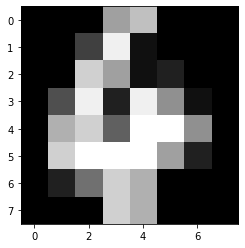

In [28]:
plt.imshow(X_test[0].reshape(8,8),cmap='gray') #원래이미지 4

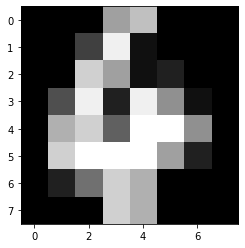

In [31]:
plt.imshow(a.reshape(8,8),cmap='gray') #표준화한 값

- 전처리의 중요성
    - 데이터가 많을 수록 좋으나 양질의 데이터가 필요함
        - 현실에서는 많지 않음.
        원데이터와 유사하게 하거나
   >   garbage in garbage out
        - 좋은데이터를 위해서 양질의 데이터가 필요함
        - 전체의 80%나 차지하는중요한 부분
             
 - 필수적인 전처리 
        - 라벨 인코딩(ordinal), 원핫 인코딩(nominal)
        - 결측치 처리
 - 성능을 올리기 위한 전처리 : scaling, feature selection

딥러닝의 알고리즘 :뉴럴네트워크 기반은 0~1사이에서 제일 잘됨
- 속도 향상
- 정확도 향상

자연어처리도 예측을 위해서 숫자로 바꾸고 크기도 변경해야함
결측치를 크기를 맞춤
딥러닝 :음성,이미지, 성능 좋아짐
- 인공지능의 겨울이 지나가게됨.

### 4.이미지 데이터 학습

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier()

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

프레임워크마다 input 의 차원이 다름
- 대부분이 **2차원**으로 데이터를 받도록함
    - 예측, 전통적 알고리즘

숫자 3으로 맞춤

In [35]:
knn.predict(X_test[0].reshape(1,-1)) #2차원 변경

array([4])

실제 값은 4
- 정확히 맞춤

In [36]:
y_test[0]      #이미지 라벨 확인

4

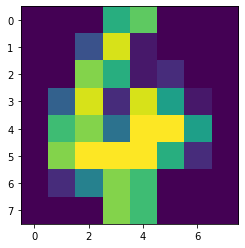

In [27]:
plt.imshow(X_test[0].reshape(8,8)) #이미지 확인 

## 파이프 라인
- 과정을 자동화 하는 기법으로 활용,응용이 중요

예시 . Orange:  https://orange.biolab.si/download/#windows 
- drag&drop 형식으로 모든 과정을 연결해서 사용
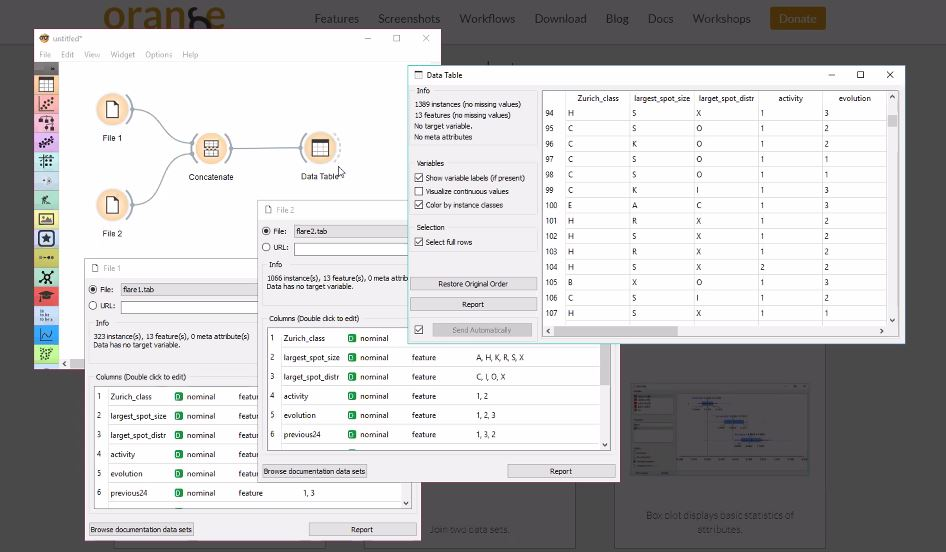


### Pipeline

`pipeline([( 지정 이름, 인스턴스화한 객체   )   ])`
- 데이터 전처리,학습 하는 과정을 한번에 할 수 있음
    - 전체 데이터에 적용됨
- **structured araay** 형태로 넣어 **순서대로 실행**
- 이름 따로 지정해야함
- 마지막에 estimator넣어야함
-  instance /factory method 방식

In [8]:
from sklearn.pipeline import Pipeline, make_pipeline #class

스케일링한 후 KNN 분류기로 학습을 파이프라인을 통해 한번에 해결

In [234]:
pipe=Pipeline([('mm',MinMaxScaler() ),('knn',KNeighborsClassifier() )]) #steps -> list #전통적 

In [235]:
pipe.fit(data.data,data.target) #학습

Pipeline(memory=None,
         steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

파이프라인은 structured array형태를 사용

### structured array

In [226]:
x=np.rec.array([('rio',1 ),( 'ta',2)], dtype=[('name','U10'),('age','i8')])
x

rec.array([('rio', 1), ('ta', 2)],
          dtype=[('name', '<U10'), ('age', '<i8')])

In [227]:
x.name

array(['rio', 'ta'], dtype='<U10')

In [228]:
x.age

array([1, 2], dtype=int64)

### make_pipeline
`make_pipeline`
- Pipeline 규칙이 어려워서 간단하게 사용할 수 있도록 함수를 만듦
    - 전체 데이터에 적용됨
- 자동으로 이름 만들어줌
    - 이름 규칙:이름의 소문자로 변경
    

 '*steps'차례대로 실행함
 - 가변 포지셔널 -무한히 넣을 수 있음.

In [234]:
pipe=Pipeline([('mm',MinMaxScaler() ),('knn',KNeighborsClassifier() )]) #steps -> list #전통적 

In [235]:
pipe.fit(data.data,data.target) #학습

Pipeline(memory=None,
         steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

이름 지정 없이 간단하게 사용가능.

In [240]:
#make_pipeline와 위의 Pipeline비교
pipe2= make_pipeline(MinMaxScaler(),KNeighborsClassifier())

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

### Pipeline 단점
- 선택적으로 할 수없이 **모든 데이터에 다 적용됨**
    - 열별 특성 반영 불가
예. 스케일러도 모든 데이터에 다 적용된것.
-  dtype 에 문자열이 잇는경우 표준화 불가해서 에러가 남.

###  ColumnTransformer
pipeline 과 같이 사용되는데 columns 을 선택 가능하도록 함

In [11]:
mpg=sns.load_dataset('mpg')

In [12]:
mpg.drop(columns='name',inplace=True) # name문자열 제거

- 컬럼 별 데이터 타입이 다르므로 pipeline을 따로 적용해야함
    - embeding : 데이터가 object 로 되어있기 때문에 수치형으로 변경해줘야함
    - imputing: horsepower 결측치 처리

In [19]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


`ColumnTransformer( [ ('이름', 파이프,['컬럼명']   ) ] ) `
- 결측치 처리하고 인코딩하는 파이프라인을 생성
- 각 파이프라인을 원하는 컬럼을 지정하여 컬럼 별로 적용

In [13]:
from sklearn.compose import ColumnTransformer   #
from sklearn.impute import SimpleImputer        #결측치 처리
from sklearn.preprocessing import OneHotEncoder #인코딩 (문자->숫자)
from sklearn.neighbors import KNeighborsRegressor#estimator

In [14]:
pipe1=make_pipeline(SimpleImputer() )

In [15]:
pipe2=make_pipeline(OneHotEncoder() )

- horsepower 컬럼의 결측치 처리
- origin의 문자열을 인코딩하는 파이프라인을 생성

In [16]:
ct=ColumnTransformer(
[
    ('p1',pipe1,['horsepower']  ), ('p2',pipe2,['origin']),
    
])

In [17]:
ct.fit_transform(mpg.iloc[:,1:],mpg.mpg)

array([[130.,   0.,   0.,   1.],
       [165.,   0.,   0.,   1.],
       [150.,   0.,   0.,   1.],
       ...,
       [ 84.,   0.,   0.,   1.],
       [ 79.,   0.,   0.,   1.],
       [ 82.,   0.,   0.,   1.]])

In [18]:
pipe3=make_pipeline(ct,KNeighborsRegressor()) #

In [19]:
pipe3.fit(mpg.iloc[:,1:], mpg.mpg)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('p1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['horsepower']),
                                                 ('p2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['origin'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

### set_config
`set_config` 는 pipeline 의 과정을 시각화 하여 이해를 도움
    - 모델링이 복잡해지면 이해하기 어려워 지기 때문

In [24]:
from sklearn import set_config
import sklearn

sklearn 버전 0.23 부터 지원 
- `-U` 새로운 버전 잇으면 업데이트'
- 커널 재시작하여  메모리오 올라간거 지워야함

In [27]:
#del sklearn
#!pip install -U scikit-learn --user #관리자 권한 없어서 --user

In [28]:
sklearn.__version__ #버전 체크 0.23 부터 가능

'0.23.1'

In [29]:
set_config(display)

In [30]:
set_config(display='diagram')

In [31]:
ct

ColumnTransformer(transformers=[('p1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['horsepower']),
                                ('p2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['origin'])])

In [40]:
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('p1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['horsepower']),
                                                 ('p2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['origin'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [41]:
pipe2

Pipeline(steps=[('onehotencoder', OneHotEncoder())])

- **자동화 가능 (`GridSearchCV`,`Pipeline`,`make_pipeline`, `tpot`)**
    - 기계가 스스로 찾아서 하는 전처리가 더 빠르고 좋을때가 있음.
   - dimension reduction , feature extraction/selection 나중에 다룸

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
pipe1=make_pipeline(SimpleImputer() )
pip4=make_pipeline(LabelEncoder())

In [34]:
ct=ColumnTransformer(
[
    ('p1',pipe1,['horsepower']  ), ('p4',pip4,['origin']),
    
])

In [35]:
ct

ColumnTransformer(transformers=[('p1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['horsepower']),
                                ('p4',
                                 Pipeline(steps=[('labelencoder',
                                                  LabelEncoder())]),
                                 ['origin'])])

In [36]:
le=LabelEncoder()
le.fit_transform(mpg.origin) #1차식을 받음 #2차원 데이터 불가

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,

fit_transform() takes 2 positional arguments but 3 were given
1 차식은 가능하나 2차원 데이터는 불가하여 에러 발생

In [37]:
ct.fit_transform(mpg.iloc[:,1:],mpg.mpg) # TypeError

TypeError: fit_transform() takes 2 positional arguments but 3 were given

### overloading 
- 고급기법 overloading 으로 중요함(기똥참)
- 기능을 지원하지않아서 **상속**해서 2차원으로 변경

 - 상속해서 오버라이딩 해서 클래스 메소드,attribute 변경함
decorator 쓰는 이유
- 기존의 decorator를 function 의 기능을 바꾸는것
- 현재 버전에서는 1차식을 지원하지 않아 label encoder 가 2차 받을수 잇또록 함

In [79]:
class LabelEncoder2D(LabelEncoder): 
    def fit_transform(self,y,*arg, **kwagg):
        from sklearn.utils import column_or_1d
        y=column_or_1d(y)
        return super().fit_transform(y).reshape(-1,1)
        
    def transform(self,y,*arg, **kwagg):
        from sklearn.utils import column_or_1d
        y=column_or_1d(y)
        return super().transform(y).reshape(-1,1)                         

1. super( ) 부모님이 사용하는거 상속받음
2. ` fit_transform` 할때 2차로 변경함.reshape(-1,1)
3. *arg, * *kwagg 키워드 에러 방지
4. column_or_1d
    - 1차원만 입력값으로 받거나 바꾸어줌
        - 에러 메시지 방지

1.  horsepower를 결측치 대체
    - pipe1=make_pipeline(SimpleImputer() )
2. overlaoding한 LabelEncoder2D 사용
    - pip4=make_pipeline(LabelEncoder2D())

In [81]:
pip4=make_pipeline(LabelEncoder2D())  #overloading

In [82]:
ct=ColumnTransformer(
[
    ('p1',pipe1,['horsepower']  ), ('p4',pip4,['origin'])   
])

In [83]:
ct.fit_transform(mpg.iloc[:,1:],mpg.mpg) #성공적!!

array([[130.        ,   2.        ],
       [165.        ,   2.        ],
       [150.        ,   2.        ],
       [150.        ,   2.        ],
       [140.        ,   2.        ],
       [198.        ,   2.        ],
       [220.        ,   2.        ],
       [215.        ,   2.        ],
       [225.        ,   2.        ],
       [190.        ,   2.        ],
       [170.        ,   2.        ],
       [160.        ,   2.        ],
       [150.        ,   2.        ],
       [225.        ,   2.        ],
       [ 95.        ,   1.        ],
       [ 95.        ,   2.        ],
       [ 97.        ,   2.        ],
       [ 85.        ,   2.        ],
       [ 88.        ,   1.        ],
       [ 46.        ,   0.        ],
       [ 87.        ,   0.        ],
       [ 90.        ,   0.        ],
       [ 95.        ,   0.        ],
       [113.        ,   0.        ],
       [ 90.        ,   2.        ],
       [215.        ,   2.        ],
       [200.        ,   2.        ],
 